In [25]:
!pip install eurostat

###  Consulta a la API de Eurostat ###
Elaborado con jupyter notebook.

<b>El colectivo objetivo del estudio es:</b>

Nivel de educación (isced11): Tertiary education ED5-8 <br>
Indicador (life_sat):   JOB<br>
Género (sex): T – Total<br>
Edad (age): Y25-34 – From 25 to 34 years<br>
Los datos que se piden son:<br>

1. Crea una variable string con la url de la llamada al api de Eurostat para obtener los datos del colectivo objetivo del estudio. Ejemplo: urlEUROSTAT = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/XXX...... "<br><br>
2. Crea un diccionario con el objeto JSON que se obtiene al realizar la petición a la API de la consulta del punto anterior. <br>Imprime por pantalla el elemento "dimension" del diccionario creado.<br>
Puedes utilizar la función urlopen() de la librería urllib.request. <br><br>
3. Descarga los datos de Satisfacción en Europa (código del dataset: ilc_pw01b) en formato pandas a partir de la función get_data_df() de librería eurostat.<br><br>
4. Para instalar la librería Eurostat ejecuta en colab: !pip install eurostat<br><br>
5. Filtra el conjunto de datos solicitados en el punto 1 directamente en este Data Frame y presenta las 6 primeras filas.<br><br>
6. Construye un gráfico donde se presente el nivel de satisfacción en cada país del colectivo objetivo del estudio en el año 2018. ¿En qué país están más satisfechos con el trabajo en 2018? ¿En qué país están menos satisfechos?

In [67]:
import pandas as pd
import urllib.request
import json
import eurostat
import matplotlib.pyplot as plt

# Paso 1: Crear la variable con la URL de la API de Eurostat
urlEUROSTAT = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/ilc_pw01b?format=JSON&life_sat=JOB&isced11=ED5-8&sex=T&age=Y25-34&lang=en"

# Paso 2: Realizar la petición a la API y crear un diccionario con el objeto JSON
response = urllib.request.urlopen(urlEUROSTAT)
data = json.loads(response.read())

# Paso 3: Imprimir el elemento "dimension" del diccionario para verificar
print(data['dimension'])

# Paso 4: Descargar los datos de satisfacción en Europa utilizando la librería eurostat
df = eurostat.get_data_df('ilc_pw01b')

{'freq': {'label': 'Time frequency', 'category': {'index': {'A': 0}, 'label': {'A': 'Annual'}}}, 'life_sat': {'label': 'Life satisfaction', 'category': {'index': {'JOB': 0}, 'label': {'JOB': 'Job'}}}, 'statinfo': {'label': 'Statistical information', 'category': {'index': {'AVG': 0}, 'label': {'AVG': 'Average'}}}, 'isced11': {'label': 'International Standard Classification of Education (ISCED 2011)', 'category': {'index': {'ED5-8': 0}, 'label': {'ED5-8': 'Tertiary education (levels 5-8)'}}}, 'sex': {'label': 'Sex', 'category': {'index': {'T': 0}, 'label': {'T': 'Total'}}}, 'age': {'label': 'Age class', 'category': {'index': {'Y25-34': 0}, 'label': {'Y25-34': 'From 25 to 34 years'}}}, 'unit': {'label': 'Unit of measure', 'category': {'index': {'RTG': 0}, 'label': {'RTG': 'Rating (0-10)'}}}, 'geo': {'label': 'Geopolitical entity (reporting)', 'category': {'index': {'EU27_2020': 0, 'BE': 1, 'BG': 2, 'CZ': 3, 'DK': 4, 'DE': 5, 'EE': 6, 'IE': 7, 'EL': 8, 'ES': 9, 'FR': 10, 'HR': 11, 'IT': 12

In [69]:
# Paso 5: Filtrar los datos para obtener solo los de 2018 y las características específicas
df_filtered = df[(df['life_sat'] == 'JOB') & 
                 (df['isced11'] == 'ED5-8') & 
                 (df['sex'] == 'T') & 
                 (df['age'] == 'Y25-34')]

# Paso 6: Seleccionar las columnas relevantes y el año 2018
df_filtered = df_filtered[['geo\\TIME_PERIOD', '2018']]
df_filtered.columns = ['Country', 'Satisfaction']


# Paso 7: Mostrar las primeras 6 filas del DataFrame filtrado con estilo
styled_table = df_filtered.head(6).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f2f2f2'),
                                        ('color', '#333'),
                                        ('font-weight', 'bold'),
                                        ('text-align', 'center')]},
     {'selector': 'tbody td', 'props': [('text-align', 'center')]}]
).set_properties(**{'border': '1px solid black', 'padding': '10px'})

# Mostrar la tabla estilizada en un notebook Jupyter (si es el caso)
from IPython.display import display
display(styled_table)

,Country,Satisfaction
21302,AL,6.500000
21303,AT,8.000000
21304,BE,7.600000
21305,BG,7.000000
21306,CH,7.500000
21307,CY,7.400000


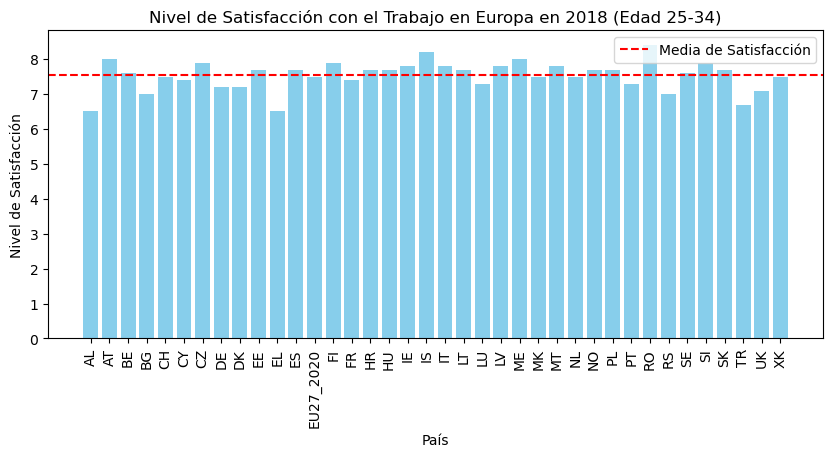

El país con mayor satisfacción con el trabajo en 2018 es: RO
Los países con menor satisfacción con el trabajo en 2018 son:
      Country  Satisfaction
21302      AL           6.5
21312      EL           6.5


In [68]:

# Construir gráfico de nivel de satisfacción en cada país en el año 2018
plt.figure(figsize=(10, 4))
plt.bar(df_filtered['Country'], df_filtered['Satisfaction'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Nivel de Satisfacción')
plt.title('Nivel de Satisfacción con el Trabajo en Europa en 2018 (Edad 25-34)')
plt.xticks(rotation=90)
plt.axhline(y=df_filtered['Satisfaction'].mean(), color='r', linestyle='--', label='Media de Satisfacción')
plt.legend()
plt.show()

# Países con mayor y menor satisfacción con el trabajo en 2018
max_satisfaction_country = df_filtered.loc[df_filtered['Satisfaction'].idxmax()]['Country']
min_satisfaction_value = df_filtered['Satisfaction'].min()
min_satisfaction_countries = df_filtered[df_filtered['Satisfaction'] == min_satisfaction_value]

print(f'El país con mayor satisfacción con el trabajo en 2018 es: {max_satisfaction_country}')
print('Los países con menor satisfacción con el trabajo en 2018 son:')
print(min_satisfaction_countries)